In [18]:
from trainer import *

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import numpy

# Model Def

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training

In [21]:
batch_size = 10

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [23]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# trainset.data = torch.from_numpy(trainset.data).cuda()
# trainset.targets = torch.from_numpy(np.array(trainset.targets)).cuda()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## SLR

In [24]:
model_s = CNN()
model_s = model_s.cuda()

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model_s.parameters(), lr=0.01)

In [26]:
slr_op = train_slr(model_s, trainloader, testloader, criterion, optimizer)

Epoch: 0
Accuracy of the network for this batch: 41.1040 %
Epoch: 1
Accuracy of the network for this batch: 49.5680 %
Epoch: 2
Accuracy of the network for this batch: 52.7160 %
Epoch: 3
Accuracy of the network for this batch: 54.6700 %
Epoch: 4
Accuracy of the network for this batch: 55.8920 %
Epoch: 5
Accuracy of the network for this batch: 57.0000 %
Epoch: 6
Accuracy of the network for this batch: 57.6500 %
Epoch: 7
Accuracy of the network for this batch: 58.5280 %
Epoch: 8
Accuracy of the network for this batch: 59.2160 %
Epoch: 9
Accuracy of the network for this batch: 59.7380 %


In [27]:
slr_op

{'time': 223.08259844779968,
 'train_acc': [41.104,
  49.568,
  52.716,
  54.67,
  55.892,
  57.0,
  57.65,
  58.528,
  59.216,
  59.738],
 'test_acc': [46.87,
  50.16,
  52.77,
  53.78,
  54.68,
  55.54,
  56.24,
  57.26,
  57.27,
  58.19]}

## DLR

In [28]:
model_d = CNN()
model_d = model_d.cuda()

In [29]:
correct_learning_rate = 0.05
cor_lr_change = correct_learning_rate * 0
incorrect_learning_rate = 0.01
incor_lr_change = incorrect_learning_rate * 0.01

In [30]:
params = {'cor_lr': correct_learning_rate, 
          'cor_lr_change': cor_lr_change, 
          'incor_lr': incorrect_learning_rate, 
          'incor_lr_change': incor_lr_change,
          'cor_min': 6975,
          'cor_max': 7025,
          'incor_min': 175,
          'incor_max': 225,}

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model_d.parameters(), lr=correct_learning_rate)

In [32]:
dlr_op = train_dlr(model_d, trainloader, testloader, criterion, optimizer, batch_size, params)

Epoch: 0
Accuracy of the network for this batch: 41.3880 %
Epoch: 1
Accuracy of the network for this batch: 51.9900 %
Epoch: 2
Accuracy of the network for this batch: 56.2680 %
Epoch: 3
Accuracy of the network for this batch: 59.3400 %
Epoch: 4
Accuracy of the network for this batch: 61.6760 %
Epoch: 5
Accuracy of the network for this batch: 63.3680 %
Epoch: 6
Accuracy of the network for this batch: 64.8460 %
Epoch: 7
Accuracy of the network for this batch: 66.1400 %
Epoch: 8
Accuracy of the network for this batch: 67.3220 %
Epoch: 9
Accuracy of the network for this batch: 68.3580 %


In [33]:
dlr_op

{'time': 209.3898196220398,
 'train_acc': [41.388,
  51.99,
  56.268,
  59.34,
  61.676,
  63.368,
  64.846,
  66.14,
  67.322,
  68.358],
 'test_acc': [48.11,
  53.03,
  55.54,
  56.74,
  58.58,
  60.23,
  60.29,
  60.79,
  61.33,
  61.3],
 'cor_lr': 0.05,
 'incor_lr': 0.10800000000000207}

# Comparison

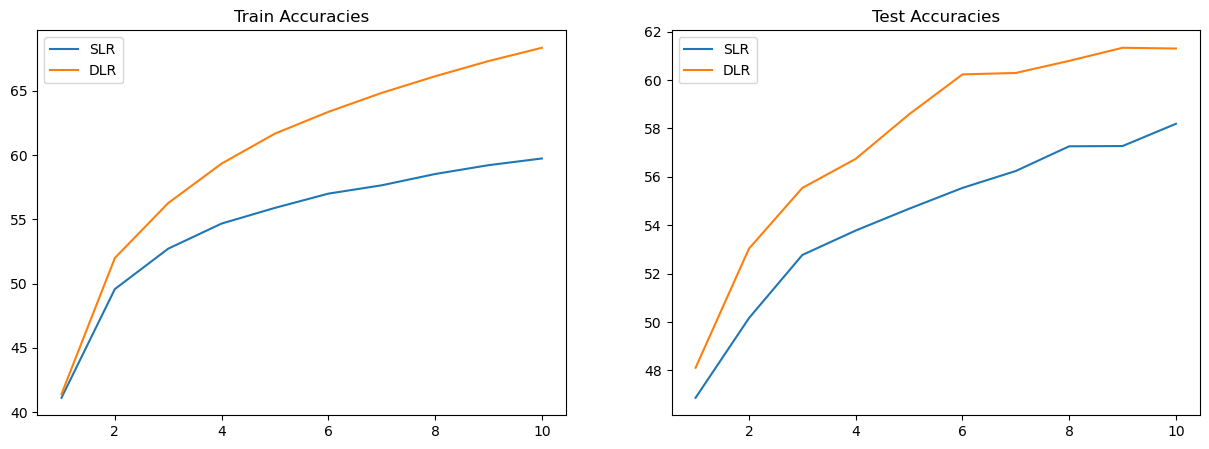

In [34]:
epoch_range = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plt.figure(211)
ax[0].plot(epoch_range, slr_op['train_acc'], label='SLR')
ax[0].plot(epoch_range, dlr_op['train_acc'], label='DLR')
ax[0].set_title("Train Accuracies")
ax[0].legend()
# ax[0].show()

# plt.figure(212)
ax[1].plot(epoch_range, slr_op['test_acc'], label='SLR')
ax[1].plot(epoch_range, dlr_op['test_acc'], label='DLR')
ax[1].set_title("Test Accuracies")
ax[1].legend()
# ax[1].show()

In [35]:
model_s

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)